In [1]:
%matplotlib notebook
DEFAULT_FIGSIZE = (8, 6)
#%matplotlib inline 
#DEFAULT_FIGSIZE = (12, 8)

import sys

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plot_sim as ps

%load_ext autoreload
%autoreload 2

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = DEFAULT_FIGSIZE

<IPython.core.display.Javascript object>


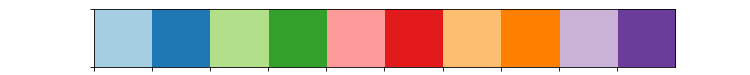

In [29]:
sns.palplot(color)

In [2]:
log = ps.ProcessedRecord('../tools/build/test.pb.cobs')

In [4]:
log.messages[0].controller

feedback {
  k_p: 100.0
  k_d: 0.0
}
feedforward {
  inertia: 0.04271072894334793
}

In [17]:
import scipy.signal
from dtk.bicycle import benchmark_state_space_vs_speed, benchmark_matrices

_, A, B = benchmark_state_space_vs_speed(*benchmark_matrices(), [log.messages[0].model.v])
A = np.squeeze(A)
B = np.squeeze(B)
system = scipy.signal.lti(A, B, np.eye(4), np.zeros((4, 2)))

u = log.records.input.reshape((-1, 2, 1))
_, _, x = scipy.signal.lsim(system, u, log.t)

dx = np.dot(A, x.transpose()) + np.dot(B, u.reshape(-1, 2).transpose())
dx = dx.transpose()

In [44]:
steer_angle = log.states[:, 1]
a = scipy.signal.savgol_filter(
    steer_angle, 111, 3, deriv=2, delta=0.001)

<IPython.core.display.Javascript object>


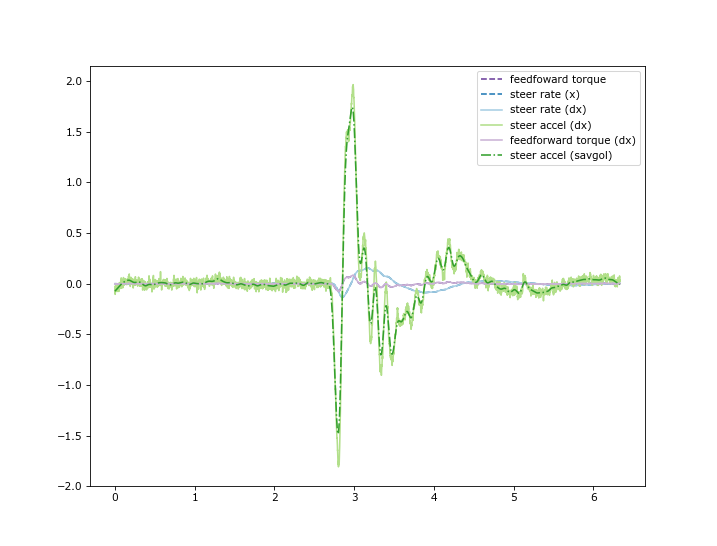

In [46]:
plt.close('all')
fig, ax = plt.subplots()

color = sns.color_palette('Paired', 10)
ax.plot(log.t,
        log.records.controller.feedforward.torque,
        linestyle='--',
        color=color[9],
        label='feedfoward torque')
ax.plot(log.t,
        x[:, 3],
        linestyle='--',
        color=color[1],
        label='steer rate (x)')
ax.plot(log.t,
        dx[:, 1],
        color=color[0],
        label='steer rate (dx)')
ax.plot(log.t,
        dx[:, 3],
        color=color[2],
        label='steer accel (dx)')
ax.plot(log.t,
        dx[:, 3]*log.messages[0].controller.feedforward.inertia,
        color=color[8],
        label='feedforward torque (dx)')
ax.plot(log.t,
        a,
        linestyle='-.',
        color=color[3],
        label='steer accel (savgol)')
ax.legend()
#log.plot_controller_states(degrees=True)
#log.plot_torque_signals()
plt.show()